<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Klasifikasi_Jenis_Kaca_untuk_Forensik_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== METADATA DATASET GLASS IDENTIFICATION ===
{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is 

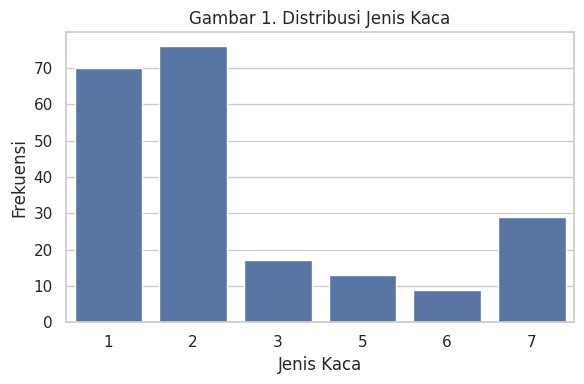

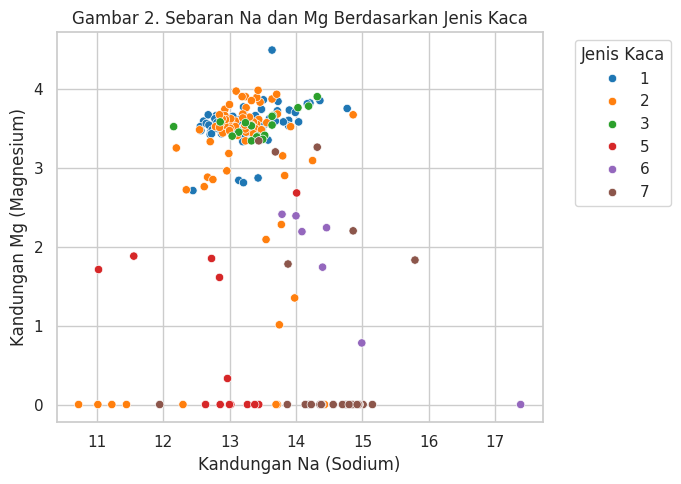

Daftar fitur yang digunakan dalam pemodelan:
['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'] 

Ukuran data latih : (171, 9)
Ukuran data uji   : (43, 9) 

=== EVALUASI MODEL DECISION TREE ===
Akurasi pada data uji: 0.698

Laporan klasifikasi:
              precision    recall  f1-score   support

           1      0.667     0.714     0.690        14
           2      0.714     0.667     0.690        15
           3      0.000     0.000     0.000         3
           5      1.000     0.667     0.800         3
           6      0.400     1.000     0.571         2
           7      0.857     1.000     0.923         6

    accuracy                          0.698        43
   macro avg      0.606     0.675     0.612        43
weighted avg      0.674     0.698     0.676        43

Confusion matrix (raw counts):
[[10  3  0  0  0  1]
 [ 2 10  0  0  3  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]] 



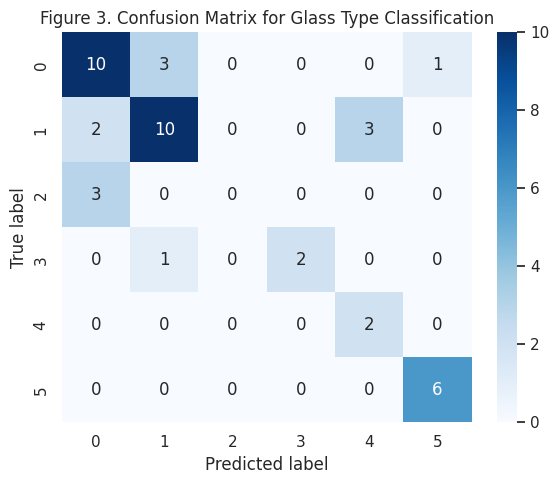

Pentingnya fitur (urutan dari yang paling berpengaruh):
Ba    0.310546
Al    0.207780
Mg    0.207397
Na    0.124478
Ca    0.108521
Si    0.041277
RI    0.000000
K     0.000000
Fe    0.000000
dtype: float64 



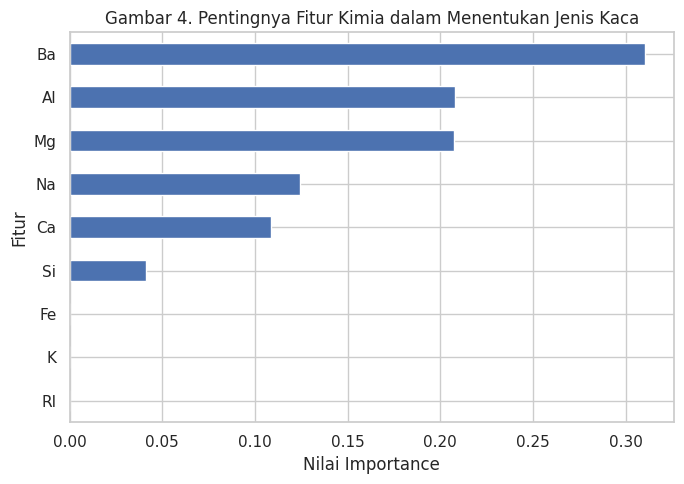

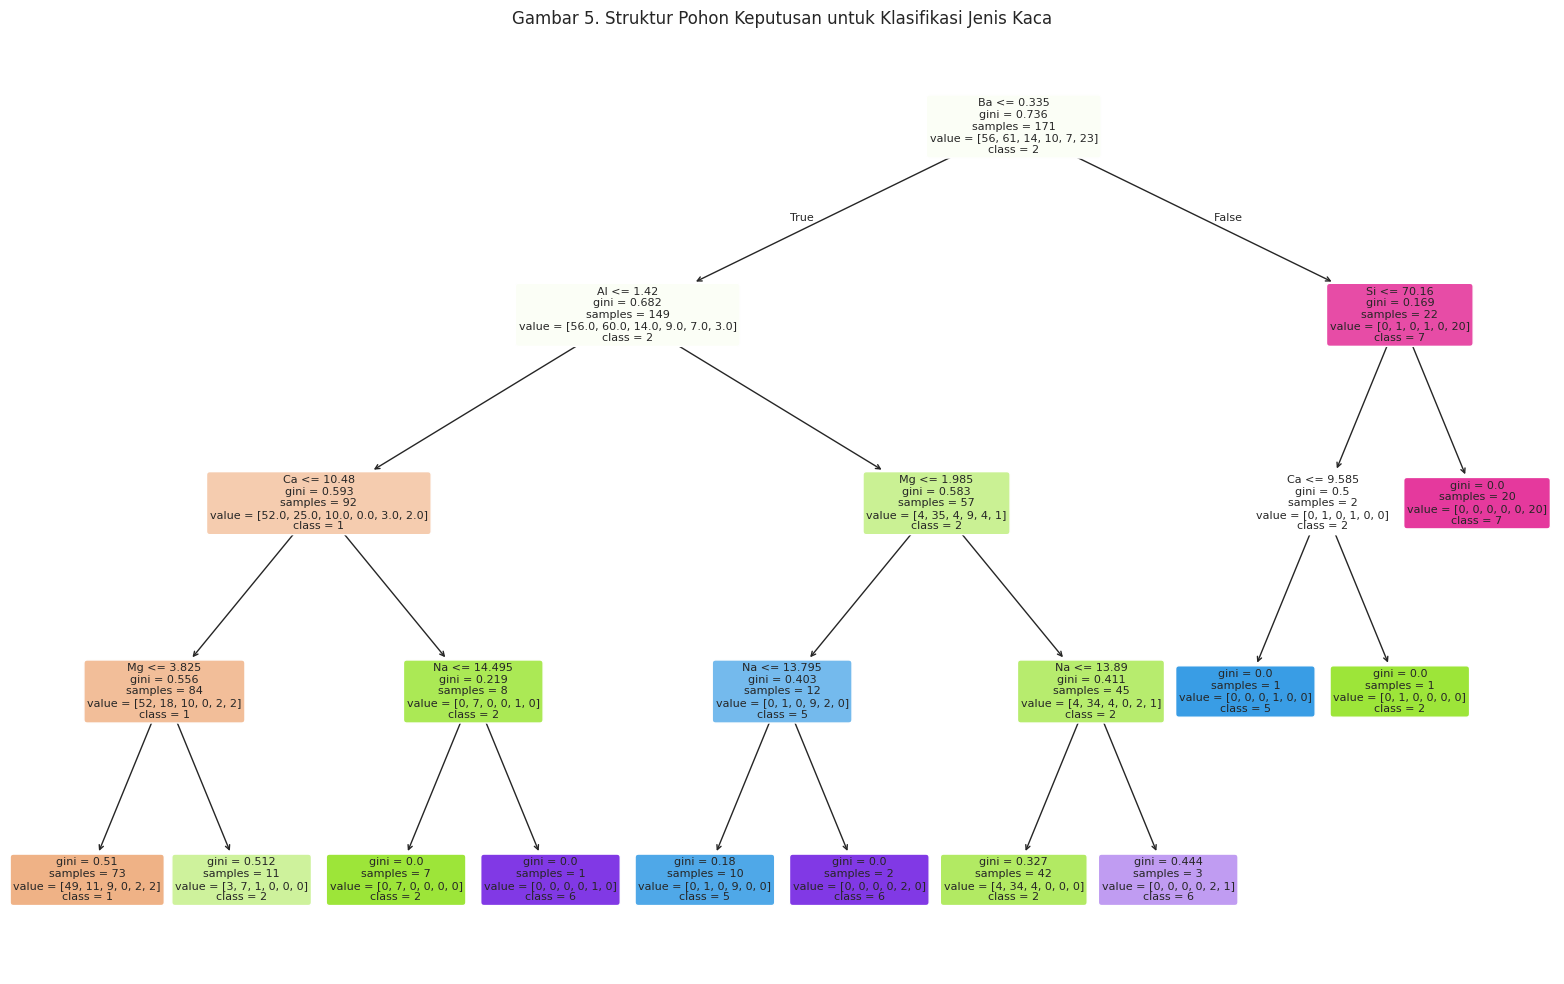

In [1]:
# ==========================================================
# Judul      : Klasifikasi Jenis Kaca untuk Forensik Digital
# Konteks    : Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Studi Kasus: Glass Identification – Simulasi Forensik Digital
# Algoritma  : DecisionTreeClassifier (Klasifikasi Multikelas)
# Dataset    : Glass Identification – UCI Machine Learning Repository (ID: 42)
# Link UCI   : https://archive.ics.uci.edu/dataset/42/glass+identification
# Repo       : https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingkungan : Google Colab
# ==========================================================

# Instalasi ucimlrepo (untuk mengambil dataset dan metadata dari UCI)
!pip install ucimlrepo -q

# Tahap 1 – Import pustaka
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.0)

# ==========================================================
# Tahap 2 – Mengambil dataset Glass Identification via ucimlrepo
# ==========================================================

glass_identification = fetch_ucirepo(id=42)

# Data sebagai pandas DataFrame
X = glass_identification.data.features.copy()
y_df = glass_identification.data.targets.copy()

print("=== METADATA DATASET GLASS IDENTIFICATION ===")
print(glass_identification.metadata, "\n")

print("=== INFORMASI VARIABEL (CONTOH) ===")
print(glass_identification.variables.head(), "\n")

# Menggabungkan fitur dan target untuk eksplorasi awal
target_col = y_df.columns[0]
df = pd.concat([X, y_df], axis=1)

print("Lima baris pertama data:")
print(df.head(), "\n")

print("Ukuran data (baris, kolom):", df.shape, "\n")

print("Distribusi kelas (jenis kaca):")
print(df[target_col].value_counts().sort_index(), "\n")

print("Statistik deskriptif fitur kimia:")
print(df.drop(columns=[target_col]).describe().T, "\n")

# ==========================================================
# Tahap 3 – Analisis data awal dan visualisasi
# ==========================================================

# Gambar 1 – Distribusi jenis kaca
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title("Gambar 1. Distribusi Jenis Kaca")
plt.xlabel("Jenis Kaca")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

# Deteksi nama kolom Na dan Mg secara dinamis
na_col = [c for c in X.columns if "na" in c.lower()][0]
mg_col = [c for c in X.columns if "mg" in c.lower()][0]

# Gambar 2 – Sebaran Na vs Mg per jenis kaca
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x=na_col,
    y=mg_col,
    hue=df[target_col].astype(str),
    palette="tab10"
)
plt.title("Gambar 2. Sebaran Na dan Mg Berdasarkan Jenis Kaca")
plt.xlabel(f"Kandungan {na_col} (Sodium)")
plt.ylabel(f"Kandungan {mg_col} (Magnesium)")
plt.legend(title="Jenis Kaca", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 4 – Menyiapkan fitur dan target untuk pemodelan
# ==========================================================

X_fitur = df.drop(columns=[target_col])
y = df[target_col]

nama_fitur = X_fitur.columns
print("Daftar fitur yang digunakan dalam pemodelan:")
print(list(nama_fitur), "\n")

# ==========================================================
# Tahap 5 – Pemisahan data latih dan data uji
# ==========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_fitur,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Ukuran data latih :", X_train.shape)
print("Ukuran data uji   :", X_test.shape, "\n")

# ==========================================================
# Tahap 6 – Membangun dan melatih model Decision Tree
# ==========================================================

model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

# ==========================================================
# Tahap 7 – Evaluasi model (dengan Confusion Matrix berbahasa Inggris)
# ==========================================================

y_pred = model.predict(X_test)

akurasi = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("=== EVALUASI MODEL DECISION TREE ===")
print(f"Akurasi pada data uji: {akurasi:.3f}\n")

print("Laporan klasifikasi:")
print(
    classification_report(
        y_test,
        y_pred,
        digits=3,
        zero_division=0  # mencegah UndefinedMetricWarning untuk kelas tanpa prediksi
    )
)

print("Confusion matrix (raw counts):")
print(cm, "\n")

# Confusion matrix (diminta tetap dalam bahasa Inggris)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Figure 3. Confusion Matrix for Glass Type Classification")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 8 – Analisis pentingnya fitur (feature importance)
# ==========================================================

importance = pd.Series(model.feature_importances_, index=nama_fitur)
importance_urut = importance.sort_values(ascending=True)

print("Pentingnya fitur (urutan dari yang paling berpengaruh):")
print(importance_urut.sort_values(ascending=False), "\n")

# Gambar 4 – Diagram batang pentingnya fitur kimia
plt.figure(figsize=(7, 5))
importance_urut.plot(kind="barh")
plt.title("Gambar 4. Pentingnya Fitur Kimia dalam Menentukan Jenis Kaca")
plt.xlabel("Nilai Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 9 – Visualisasi struktur pohon keputusan
# ==========================================================

from sklearn import tree

plt.figure(figsize=(16, 10))
tree.plot_tree(
    model,
    feature_names=list(nama_fitur),
    class_names=sorted(y.unique().astype(str)),
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Gambar 5. Struktur Pohon Keputusan untuk Klasifikasi Jenis Kaca")
plt.tight_layout()
plt.show()
